Leaky Integrate and Fire Model

In [54]:
using PyPlot;         # Tells the computer to “add” a package for (later) generating plots;
using Distributions;

Δt = 0.001;           
TotalTime = 400;
N  = round(Int,TotalTime/Δt);         
srand(10);


V = zeros(N,1);      # Initialization of an array of N elements, filled with 0;
I = zeros(N,1);      # Initialization of an array of N elements, filled with 0;
 

V[1] = -57.;           # Initial condition for the numerical solution;
I[1] = 0;

### EIF parameters
delta = 1.51;

threshold = true; #enable/disable threshold
theta = -42.0;      #threshold value

g(x) = (1/17.2)*(V[1] - x + delta*exp((x-theta)/delta)); # exponential (EIF)

####################################
#g(x) = -x + V[1]; #leaky
#V[1] = -70;
#theta = -66;
#######################################
## para a corrente periódica
alfa = 0.001;
F = 20;              # Chosen frequency;
u(x) = 4 + 4*sin(2*π*F*alfa*x);
######################################


#Vdot(x) = g(x) + u(x);
#function EulerForward(n, Hdot(n), H0)
#    H(1) = H0;
#    H(n) = H(n-1) + Δt*Hdot;
#end

up = 1; 
d = Normal(up, 4);        # gerar vetor com distribução gaussiana

refractime = 1000;      #tempo refratorio em número de passos
refractory = false;     
refraccount = 0;


for k=2:N                                                  
                    
    if refractory 
        V[k] = V[1];       # Euler forward method;                   # Linear function;
        refraccount += 1;
    else
        V[k] = V[k-1] + Δt*(g(V[k-1]) + I[k-1]);
    end
    #################################################    
    
    I[k] = rand(d);                                             #gaussian noise current;
#    I[k]  = u(k*Δt);                                           # periodic current ;    

#    csi = (rand()*2 -1);                                       #random noise current
#    I[k]  = I[k-1] + csi;
#    if I[k] >= 20
#        I[k] -= 2*csi;
#    end
#    if I[k] <= 0
#        I[k] -= 2*csi;
#    end
    if k%1000 != 0
        I[k] = I[k-1];
    end
    ######################################3#######    
    if threshold                                #if is threshold is enabled
        if V[k] >= theta                        #integrate and fire condition
            V[k-1] = theta+20;
            V[k]=V[1];                           #reset
            refractory = true;
        end
    end

    if refraccount >= refractime
        refractory = false;
        refraccount = 0;
    end

end                

max = (N-1) * Δt;          # Value corresponding to the maximal integration step;
t   = 0:Δt:max;            # Initiation of an array of N elements, with increasing values (i.e. horizontal coordinate)



0.0:0.001:399.999

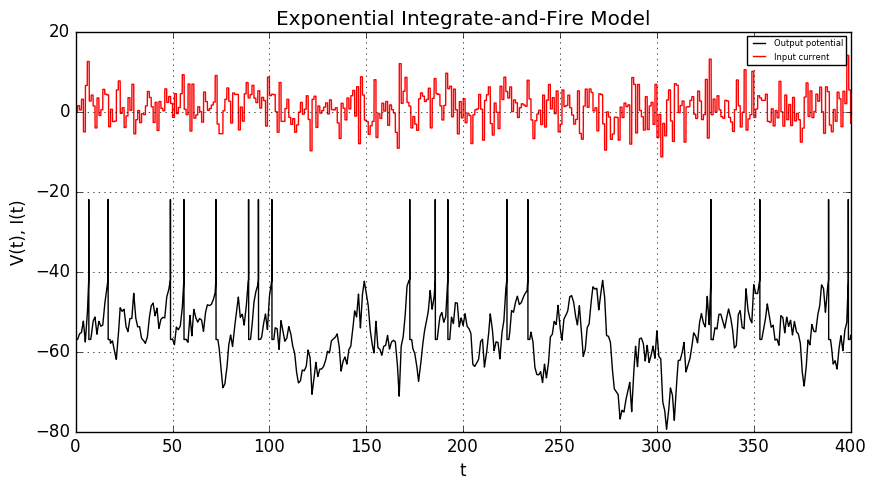

In [55]:
fig = figure("Numerical method",figsize=(10,5));    # Create a new figure, with desired size;

plot(t, V, "k-",  label="Output potential");              # Plot in the current figure, V(x) - the mumerical solution (output);
plot(t, I, "r-", label="Input current");             # Plot in the current figure, u(x) - external input;

xlabel("t");    # Label of the horizontal axis;
ylabel("V(t), I(t)");                              # Label of the vertical axis;
title("Exponential Integrate-and-Fire Model");            # Label of the title, at the top of the figure;
grid("on");                                        # "Grid" on;

legend(loc="upper right",fontsize = 6);                     # Add a legend to the current axes; 

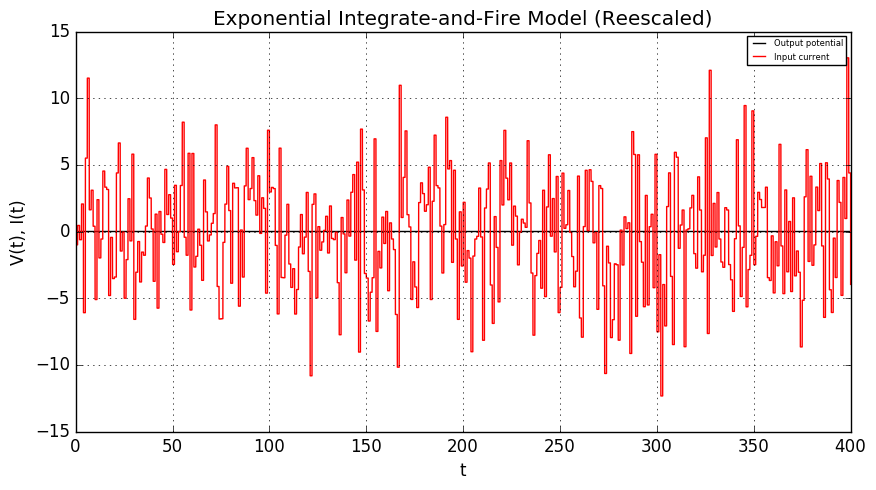

In [50]:

fig = figure("Numerical method", figsize=(10,5));    # Figure's size;   

plot(t, V - V[1], "k-", label="Output potential");                             # Plot in the current figure, V(x) - the mumerical solution (output) + 70;
plot(t, I - up, "r-", label="Input current");                              # Plot in the current figure, u(x) - external input -1;

xlabel("t");      # Label of the horizontal axis;
ylabel("V(t), I(t)");                                 # Label of the vertical axis;   
title("Exponential Integrate-and-Fire Model (Reescaled)");  # Label of the title, at the top of the figure;
grid("on");                                           # "Grid" on;
legend(loc="upper right",fontsize = 6);                      # Add a legend to the current axes; 

In [56]:
N

400000